In [1]:
import os
import sys
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cornac
from cornac.utils import cache
from cornac.datasets import filmtrust, amazon_clothing
from cornac.eval_methods import RatioSplit
from cornac.models import PMF, SoRec, WMF, CTR, BPR, VBPR
from cornac.data import GraphModality, TextModality, ImageModality
from cornac.data.text import BaseTokenizer

import tensorflow as tf
print(f"System version: {sys.version}")
print(f"Cornac version: {cornac.__version__}")
print(f"Tensorflow version: {tf.__version__}")

SEED = 1234
VERBOSE = True

System version: 3.8.19 | packaged by conda-forge | (default, Mar 20 2024, 12:49:57) 
[Clang 16.0.6 ]
Cornac version: 2.2.2
Tensorflow version: 2.13.0


## 1. Feature Modality

In [2]:
# user_features, item_features = pd.read_pickle('features.pkl')

# from cornac.data import FeatureModality

# # FeatureModality를 사용하여 사용자와 아이템의 feature를 정의합니다.
# user_feature_modality = FeatureModality(features=user_features, ids=None, normalize=False)
# item_feature_modality = FeatureModality(features=item_features, ids=None, normalize=False)

# # 평가방법 설정
# eval_method = BaseMethod.from_splits(
#     train_data=np.array(train), 
#     test_data=np.array(test), 
#     user_features=user_feature_modality, item_features=item_feature_modality,
#     exclude_unknowns=True,  # Unknown users and items will be ignored.
#     verbose=True
# )

# 2. GraphModality

## Social Recommendation (SoRec)


- SoRec 아키텍쳐
<img src='image/SoRec.png' align="left" width=800/>

In [3]:
K = 20
sorec = SoRec(k=K, max_iter=50, learning_rate=0.001, verbose=VERBOSE, seed=SEED)
pmf = PMF(k=K, max_iter=50, learning_rate=0.001, lambda_reg=0.01, verbose=VERBOSE, seed=SEED)

ratings = filmtrust.load_feedback()
trust = filmtrust.load_trust()

user_graph_modality = GraphModality(data=trust)

ratio_split = RatioSplit(
    data=ratings,
    test_size=0.2,
    rating_threshold=2.5,
    exclude_unknowns=True,
    user_graph=user_graph_modality,
    verbose=VERBOSE,
    seed=SEED,
)

mae = cornac.metrics.MAE()

cornac.Experiment(eval_method=ratio_split, models=[sorec, pmf], metrics=[mae]).run()

rating_threshold = 2.5
exclude_unknowns = True
---
Training data:
Number of users = 1475
Number of items = 1917
Number of ratings = 28396
Max rating = 4.0
Min rating = 0.5
Global mean = 3.0
---
Test data:
Number of users = 1475
Number of items = 1917
Number of ratings = 6873
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 1475
Total items = 1917

[SoRec] Training started!
Learning...
epoch 0, loss: 3336.866073
epoch 1, loss: 2928.795649
epoch 2, loss: 2463.184595
epoch 3, loss: 2220.541953
epoch 4, loss: 2110.565760
epoch 5, loss: 2044.658160
epoch 6, loss: 1995.125000
epoch 7, loss: 1954.012938
epoch 8, loss: 1918.281104
epoch 9, loss: 1886.355976
epoch 10, loss: 1857.334871


/Users/moon/miniforge3/envs/moontorch/lib/python3.8/site-packages/cornac/data/dataset.py:335: UserWarning: 1 duplicated observations are removed!
  warnings.warn("%d duplicated observations are removed!" % dup_count)


epoch 11, loss: 1830.593392
epoch 12, loss: 1805.751273
epoch 13, loss: 1782.438519
epoch 14, loss: 1760.579884
epoch 15, loss: 1739.915589
epoch 16, loss: 1720.301302
epoch 17, loss: 1701.677061
epoch 18, loss: 1683.843279
epoch 19, loss: 1666.720036
epoch 20, loss: 1650.190473
epoch 21, loss: 1634.138636
epoch 22, loss: 1618.498840
epoch 23, loss: 1603.170566
epoch 24, loss: 1588.072386
epoch 25, loss: 1573.162621
epoch 26, loss: 1558.358803
epoch 27, loss: 1543.639841
epoch 28, loss: 1528.936375
epoch 29, loss: 1514.278548
epoch 30, loss: 1499.564991
epoch 31, loss: 1484.921134
epoch 32, loss: 1470.206048
epoch 33, loss: 1455.558934
epoch 34, loss: 1440.879926
epoch 35, loss: 1426.297133
epoch 36, loss: 1411.787029
epoch 37, loss: 1397.317718
epoch 38, loss: 1383.071672
epoch 39, loss: 1368.839710
epoch 40, loss: 1354.889690
epoch 41, loss: 1340.959270
epoch 42, loss: 1327.356135
epoch 43, loss: 1313.816972
epoch 44, loss: 1300.516715
epoch 45, loss: 1287.367541
epoch 46, loss: 1274

Rating:   0%|          | 0/6873 [00:00<?, ?it/s]


[PMF] Training started!
Learning...
epoch 0, loss: 3260.518425
epoch 1, loss: 3123.428723
epoch 2, loss: 2936.524485
epoch 3, loss: 2778.610802
epoch 4, loss: 2658.799484
epoch 5, loss: 2567.284771
epoch 6, loss: 2495.441571
epoch 7, loss: 2437.683320
epoch 8, loss: 2390.344491
epoch 9, loss: 2350.879752
epoch 10, loss: 2317.429363
epoch 11, loss: 2288.622307
epoch 12, loss: 2263.486231
epoch 13, loss: 2241.328288
epoch 14, loss: 2221.630328
epoch 15, loss: 2203.990717
epoch 16, loss: 2188.092781
epoch 17, loss: 2173.683612
epoch 18, loss: 2160.558220
epoch 19, loss: 2148.548212
epoch 20, loss: 2137.513659
epoch 21, loss: 2127.337084
epoch 22, loss: 2117.919045
epoch 23, loss: 2109.174712
epoch 24, loss: 2101.031310
epoch 25, loss: 2093.426001
epoch 26, loss: 2086.304263
epoch 27, loss: 2079.618584
epoch 28, loss: 2073.327367
epoch 29, loss: 2067.394102
epoch 30, loss: 2061.786625
epoch 31, loss: 2056.476524
epoch 32, loss: 2051.438639
epoch 33, loss: 2046.650630
epoch 34, loss: 2042.

Rating:   0%|          | 0/6873 [00:00<?, ?it/s]


TEST:
...
      |    MAE | Train (s) | Test (s)
----- + ------ + --------- + --------
SoRec | 0.6470 |    0.4612 |   0.1171
PMF   | 0.6862 |    0.2695 |   0.0837



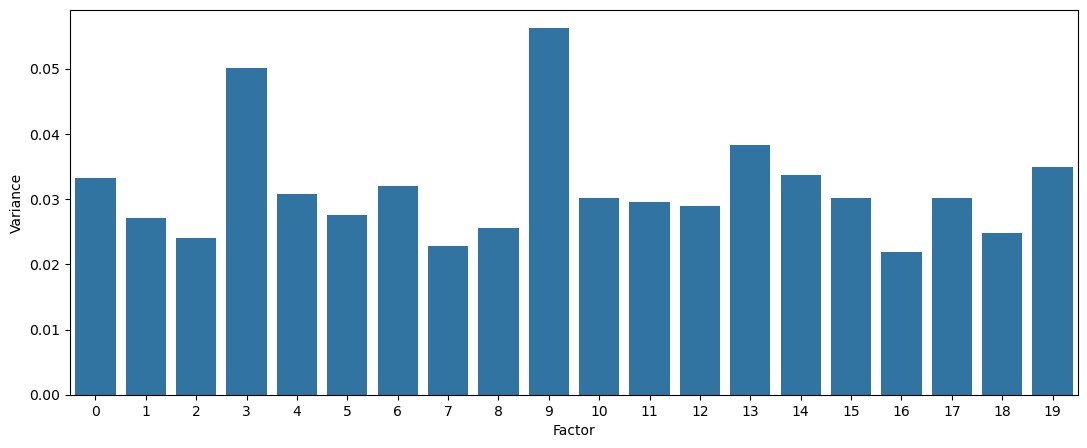

In [4]:
var_df = pd.DataFrame({"Factor": np.arange(K), "Variance": np.var(sorec.U, axis=0)})
fig, ax = plt.subplots(figsize=(13, 5))
sns.barplot(x="Factor", y="Variance", data=var_df, ax=ax);

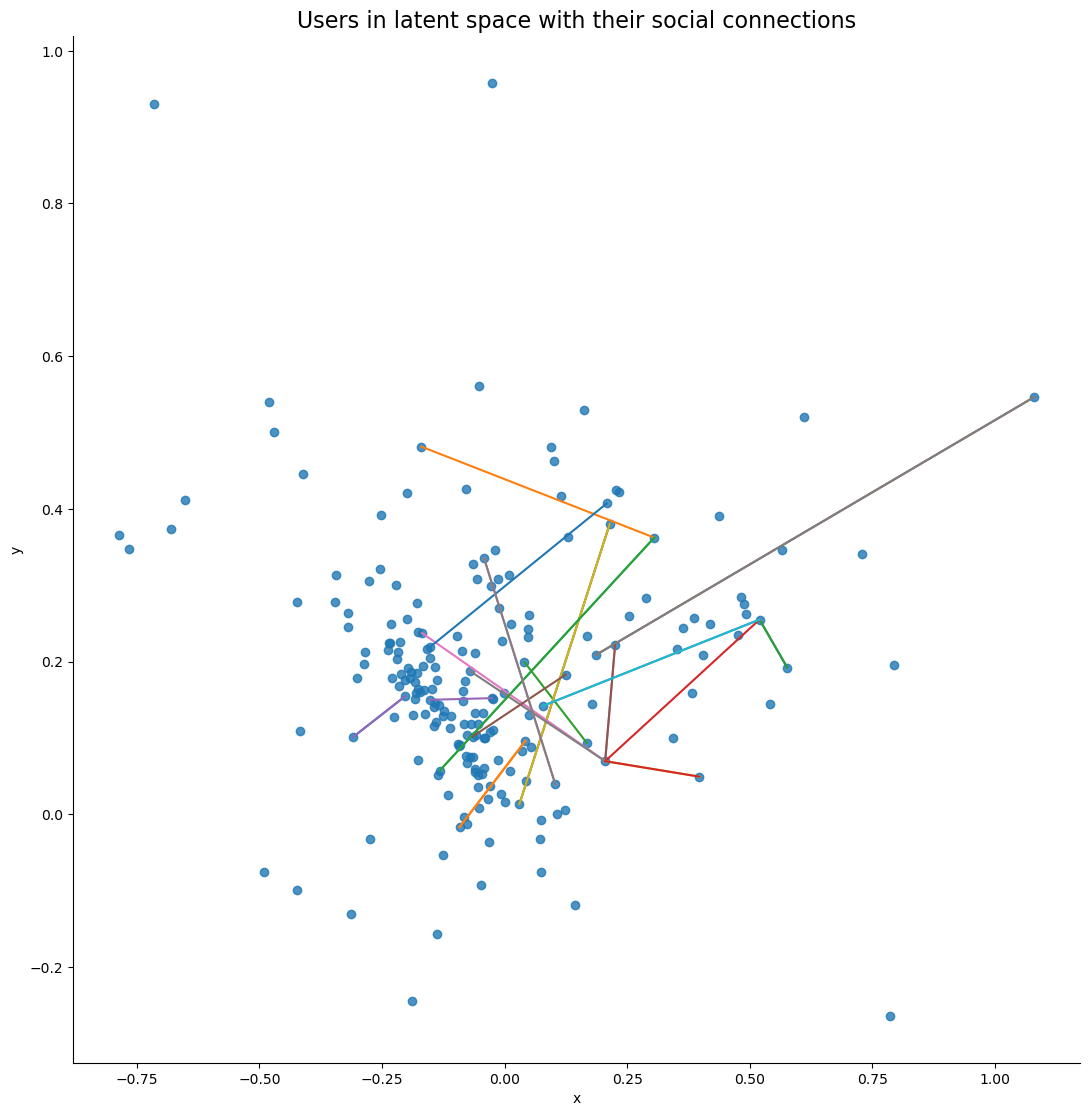

In [5]:
TOP2F = (9, 16)
SAMPLE_SIZE = 200

rng = np.random.RandomState(SEED)
sample_inds = rng.choice(np.arange(sorec.U.shape[0]), size=SAMPLE_SIZE, replace=False)
sample_df = pd.DataFrame(data=sorec.U[sample_inds][:, TOP2F], columns=["x", "y"])
g = sns.lmplot(x="x", y="y", data=sample_df, height=11.0, fit_reg=False)
g.ax.set_title("Users in latent space with their social connections", fontsize=16)

adj_mat = sorec.train_set.user_graph.matrix
for i in range(len(sample_inds)):
  for j in range(len(sample_inds)):
    if j != i and adj_mat[sample_inds[i], sample_inds[j]]:
      sns.lineplot(x="x", y="y", data=sample_df.loc[[i, j]])

# 3. TextModality

## Collaborative Topic Regression (CTR)

- CTR 아키텍쳐
<img src='CTR.png' align="left" width=800/>

In [6]:
K = 20
ctr = CTR(k=K, max_iter=50, a=1.0, b=0.01, lambda_u=0.01, lambda_v=0.01, verbose=VERBOSE, seed=SEED)
wmf = WMF(k=K, max_iter=50, a=1.0, b=0.01, learning_rate=0.005, lambda_u=0.01, lambda_v=0.01, 
          verbose=VERBOSE, seed=SEED)

ratings = amazon_clothing.load_feedback()
docs, item_ids = amazon_clothing.load_text()

item_text_modality = TextModality(
    corpus=docs,
    ids=item_ids,
    tokenizer=BaseTokenizer(sep=" ", stop_words="english"),
    max_vocab=8000,
    max_doc_freq=0.5,
)

ratio_split = RatioSplit(
    data=ratings,
    test_size=0.2,
    rating_threshold=4.0,
    exclude_unknowns=True,
    item_text=item_text_modality,
    verbose=VERBOSE,
    seed=SEED,
)

rec_50 = cornac.metrics.Recall(50)

cornac.Experiment(eval_method=ratio_split, models=[ctr, wmf], metrics=[rec_50]).run()

rating_threshold = 4.0
exclude_unknowns = True
---
Training data:
Number of users = 5066
Number of items = 3333
Number of ratings = 10951
Max rating = 5.0
Min rating = 1.0
Global mean = 4.4
---
Test data:
Number of users = 5066
Number of items = 3333
Number of ratings = 2192
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 5066
Total items = 3333

[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/1823 [00:00<?, ?it/s]


[WMF] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[WMF] Evaluation started!


Ranking:   0%|          | 0/1823 [00:00<?, ?it/s]


TEST:
...
    | Recall@50 | Train (s) | Test (s)
--- + --------- + --------- + --------
CTR |    0.2297 |   43.1849 |   0.3026
WMF |    0.1720 |    5.7785 |   0.3010



In [7]:
vocab = ctr.train_set.item_text.vocab
topic_word_dist = ctr.model.beta.T[:, -ctr.train_set.item_text.max_vocab:] 
top_word_inds = np.argsort(topic_word_dist, axis=1) + 4  # ingore 4 special tokens

topic_words = {}
topic_df = defaultdict(list)
print("WORD TOPICS:")
for t in range(len(topic_word_dist)):
  top_words = vocab.to_text(top_word_inds[t][-10:][::-1], sep=", ")
  topic_words[t+1] = top_words
  topic_df["Topic"].append(t + 1)
  topic_df["Top words"].append(top_words)
topic_df = pd.DataFrame(topic_df)
topic_df

WORD TOPICS:


,Topic,Top words
0,1,"x, company, display, motion, growth, allow, fe..."
1,2,"earrings, easily, style, helps, steel, sweat, ..."
2,3,"high, fit, cold, inches, waterproof, womens, l..."
3,4,"plus, perfect, innovative, fabric, team, shirt..."
4,5,"shoulder, use, jacket, heat, short, rubies, ho..."
5,6,"feature, little, hat, performance, s, zipper, ..."
6,7,"weight, hood, new, comfort, beautiful, large, ..."
7,8,"warm, fabric, protect, halloween, inches, idea..."
8,9,"size, color, day, comfortable, shoes, perfect,..."
9,10,"material, costume, air, designed, transport, c..."


In [8]:
UIDX = 123
TOPK = 5
item_id2idx = ctr.train_set.iid_map
item_idx2id = list(ctr.train_set.item_ids)
print(f"USER {UIDX} TOP-3 TOPICS:")
topic_df.loc[np.argsort(ctr.U[UIDX])[-3:][::-1]]

USER 123 TOP-3 TOPICS:


,Topic,Top words
6,7,"weight, hood, new, comfort, beautiful, large, ..."
15,16,"fit, fun, foot, used, items, cotton, pant, smo..."
4,5,"shoulder, use, jacket, heat, short, rubies, ho..."


In [9]:
recommendations, scores = ctr.rank(UIDX)
print(f"\nTOP {TOPK} RECOMMENDATIONS FOR USER {UIDX}:")
rec_df = defaultdict(list)
for i in recommendations[:TOPK]:
  rec_df["URL"].append(f"https://www.amazon.com/dp/{item_idx2id[i]}")
  rec_df["Description"].append(ctr.train_set.item_text.corpus[i])
pd.DataFrame(rec_df)


TOP 5 RECOMMENDATIONS FOR USER 123:


,URL,Description
0,https://www.amazon.com/dp/B001BBN2X4,Pink Felt Tiara Cowboy or Cowgirl Hat is adorn...
1,https://www.amazon.com/dp/B001DKDAVW,"Clean your fine jewelry, eyeglasses, dentures,..."
2,https://www.amazon.com/dp/B00064V6LM,Child Padded Bike Shorts are Very High Quality...
3,https://www.amazon.com/dp/B007DLVLAW,Patented elastic shoelace and fastening system...
4,https://www.amazon.com/dp/B003VY9BK2,Beautiful color Egyptian belly dancing hip wra...


# 4. ImageModality

## Visual Bayesian Personalized Ranking (VBPR)

- VBPR 아키텍쳐
<img src='VBPR.png' align="left" width=800/>

In [10]:
K = 10
vbpr = VBPR(k=K, k2=K, n_epochs=50, batch_size=100, learning_rate=0.001,
            lambda_w=1, lambda_b=0.01, lambda_e=0.0, use_gpu=True, verbose=VERBOSE, seed=SEED)
bpr = BPR(k=(K * 2), max_iter=50, learning_rate=0.001, lambda_reg=0.001, verbose=VERBOSE, seed=SEED)

ratings = amazon_clothing.load_feedback()
img_features, item_ids = amazon_clothing.load_visual_feature()

item_image_modality = ImageModality(features=img_features, ids=item_ids, normalized=True)

ratio_split = RatioSplit(
    data=ratings,
    test_size=0.2,
    rating_threshold=4.0,
    exclude_unknowns=True,
    item_image=item_image_modality,
    verbose=VERBOSE,
    seed=SEED,
)

auc = cornac.metrics.AUC()

cornac.Experiment(eval_method=ratio_split, models=[vbpr, bpr], metrics=[auc]).run()

rating_threshold = 4.0
exclude_unknowns = True
---
Training data:
Number of users = 5066
Number of items = 3333
Number of ratings = 10951
Max rating = 5.0
Min rating = 1.0
Global mean = 4.4
---
Test data:
Number of users = 5066
Number of items = 3333
Number of ratings = 2192
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 5066
Total items = 3333

[VBPR] Training started!


Epoch 1/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 2/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 3/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 4/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 5/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 6/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 7/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 8/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 9/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 10/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 11/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 12/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 13/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 14/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 15/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 16/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 17/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 18/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 19/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 20/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 21/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 22/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 23/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 24/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 25/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 26/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 27/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 28/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 29/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 30/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 31/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 32/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 33/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 34/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 35/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 36/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 37/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 38/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 39/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 40/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 41/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 42/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 43/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 44/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 45/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 46/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 47/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 48/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 49/50:   0%|          | 0/110 [00:00<?, ?it/s]

Epoch 50/50:   0%|          | 0/110 [00:00<?, ?it/s]

Optimization finished!

[VBPR] Evaluation started!


Ranking:   0%|          | 0/1823 [00:00<?, ?it/s]


[BPR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Optimization finished!

[BPR] Evaluation started!


Ranking:   0%|          | 0/1823 [00:00<?, ?it/s]


TEST:
...
     |    AUC | Train (s) | Test (s)
---- + ------ + --------- + --------
VBPR | 0.7120 |   31.8309 |   0.8360
BPR  | 0.6002 |    0.0369 |   0.7020



In [11]:
UIDX = 111

item_id2idx = vbpr.train_set.iid_map
item_idx2id = list(vbpr.train_set.item_ids)
img_features = vbpr.train_set.item_image.features
item_desc = {iid: desc for desc, iid in zip(*amazon_clothing.load_text())}

print(f"RATED ITEMS BY USER {UIDX}:")
rated_items = np.nonzero(vbpr.train_set.matrix[UIDX].A)[1]
rated_df = defaultdict(list)
for i in rated_items:
  rated_df["URL"].append(f"https://www.amazon.com/dp/{item_idx2id[i]}")
  rated_df["Description"].append(item_desc[item_idx2id[i]])
pd.DataFrame(rated_df)

RATED ITEMS BY USER 111:


,URL,Description
0,https://www.amazon.com/dp/B001GR05W4,Childhood Memories Musical Ballerina Jewelry B...
1,https://www.amazon.com/dp/B001RYA3QY,"This 8""X4""X4"" Enchantmints Music box is nice a..."
2,https://www.amazon.com/dp/B004A1PW1W,New unicorn check book wallet.


In [12]:
TOPK = 5

recommendations, scores = vbpr.rank(UIDX)

print(f"\nTOP {TOPK} RECOMMENDATIONS:")
rec_df = defaultdict(list)
for i in recommendations[:TOPK]:
  cf_contrib = vbpr.beta_item[i] + np.dot(vbpr.gamma_item[i], vbpr.gamma_user[UIDX])
  vis_contrib = vbpr.visual_bias[i] + np.dot(vbpr.theta_item[i], vbpr.theta_user[UIDX])
  rec_df["URL"].append(f"https://www.amazon.com/dp/{item_idx2id[i]}")
  rec_df["Score"].append(scores[i])
  rec_df["CF Contribution"].append(cf_contrib)
  rec_df["Visual Contribution"].append(vis_contrib)
  rec_df["Description"].append(item_desc[item_idx2id[i]])
pd.DataFrame(rec_df)


TOP 5 RECOMMENDATIONS:


,URL,Score,CF Contribution,Visual Contribution,Description
0,https://www.amazon.com/dp/B0036FFHBS,7.952936,0.330606,7.622330,this item is for 10 Pcs these assorted colored...
1,https://www.amazon.com/dp/B000I7ZHO4,7.934871,-0.035678,7.970549,Play music in the tub. Real flutes for the tub...
2,https://www.amazon.com/dp/B007OSAY2U,7.389404,-0.068125,7.457529,This offer includes 100 pieces HIGH PREMIUM QU...
3,https://www.amazon.com/dp/B001GR05W4,7.338340,0.621271,6.717068,Childhood Memories Musical Ballerina Jewelry B...
4,https://www.amazon.com/dp/B0000CNR1L,6.929195,0.229353,6.699842,No more digging around in deep toiletries bags...
